<a href="https://colab.research.google.com/github/RodrigoSchneiderbr/Machine_learning/blob/main/desafio_modulo_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import types

In [2]:
df = pd.read_csv('https://pycourse.s3.amazonaws.com/banknote_authentication.txt', header = None, names = ['variance','skewness','curtosis','entropy','class'])

In [ ]:
df.shape

(1372, 5)

In [ ]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [ ]:
df['class'].min()

0

In [ ]:
df.describe()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [ ]:
df['skewness'].mean()

1.9223531206393603

In [ ]:
df['entropy'].mean()

-1.191656520043731

In [ ]:
df.count()

variance    1372
skewness    1372
curtosis    1372
entropy     1372
class       1372
dtype: int64

In [ ]:
df_questao_7 = df.loc[df['class'] == 1]

In [ ]:
df_questao_7.count()

variance    610
skewness    610
curtosis    610
entropy     610
class       610
dtype: int64

In [ ]:
df['skewness'].corr(df['curtosis'])

-0.7868952243065794

In [ ]:
df.corr()

,variance,skewness,curtosis,entropy,class
variance,1.000000,0.264026,-0.380850,0.276817,-0.724843
skewness,0.264026,1.000000,-0.786895,-0.526321,-0.444688
curtosis,-0.380850,-0.786895,1.000000,0.318841,0.155883
entropy,0.276817,-0.526321,0.318841,1.000000,-0.023424
class,-0.724843,-0.444688,0.155883,-0.023424,1.000000


KNN

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, plot_confusion_matrix, plot_roc_curve
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import ListedColormap
import matplotlib
import matplotlib.pyplot as plt

In [69]:
x = df.iloc[:,:-1].values
y = df.iloc[:,4].values

In [ ]:
print('x = \n')
print(x[:5, :])
print('y = \n')
print(y[:5])

In [80]:
x_train, x_test,y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = 1)

aqui fiquei na duvida, precisa realizar o comando abaixo? Eles já são float, ok então não muda muito na minha concepção


In [81]:
sc = StandardScaler()
sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

In [82]:
knn_reg = KNeighborsClassifier(n_neighbors= 5)
knn_reg.fit(x_train,y_train)

KNeighborsClassifier()

In [83]:
y_pred = knn_reg.predict(x_test)

aqui a resposta dá 100%, mas esta errado...mesmo usando o SC

In [84]:
print(classification_report(y_test, y_pred))
report = classification_report(y_test,y_pred, output_dict=True)
print("acuracia: {}".format(round(report['accuracy'],5)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       235
           1       0.99      1.00      1.00       177

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412

acuracia: 0.99757


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


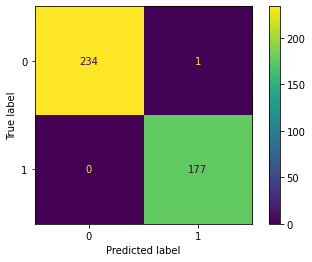

In [85]:
plot_confusion_matrix(knn_reg, x_test, y_test)

Arvore de decisao

In [86]:
clf_arvore = DecisionTreeClassifier(random_state = 1)
clf_arvore.fit(x_train,y_train)

DecisionTreeClassifier(random_state=1)

In [87]:
y_pred_decision = clf_arvore.predict(x_test)

In [88]:
print(classification_report(y_test,y_pred_decision))
report = classification_report(y_test,y_pred_decision, output_dict=True)
print("acuracia: {}".format(round(report['accuracy'],5)))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       235
           1       0.98      0.99      0.99       177

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412

acuracia: 0.98786


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


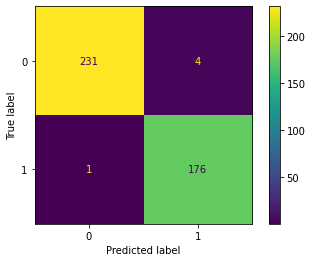

In [89]:
plot_confusion_matrix(clf_arvore,x_test,y_test)

Random forest

In [90]:
clf_floresta = RandomForestClassifier(max_depth= 8, random_state=1)
clf_floresta.fit(x_train,y_train)

RandomForestClassifier(max_depth=8, random_state=1)

In [91]:
y_pred_floresta = clf_floresta.predict(x_test)

In [92]:
print(classification_report(y_test,y_pred_floresta))
report = classification_report(y_test,y_pred_floresta, output_dict=True)
print("acuracia: {}".format(round(report['accuracy'],5)))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       235
           1       0.99      1.00      0.99       177

    accuracy                           1.00       412
   macro avg       0.99      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412

acuracia: 0.99515


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


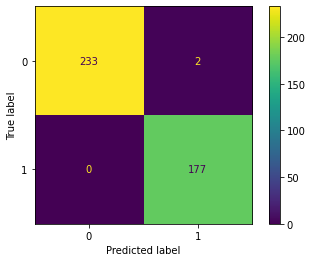

In [94]:
plot_confusion_matrix(clf_floresta, x_test,y_test)

In [95]:
from sklearn.ensemble import RandomForestClassifier

como faço para resolver isso o comando abaixo em Dataframe, pois são vetores, mas queria mexer no sistema, tipo ver o mais importante das 4 variaveis.


In [96]:
print(clf_floresta.feature_importances_)

[0.56066718 0.24058589 0.14022782 0.05851911]


In [97]:
feature_importances = pd.DataFrame([clf_floresta.feature_importances_], columns = ['variance','skewness','curtosis','entropy'])
feature_importances

,variance,skewness,curtosis,entropy
0,0.560667,0.240586,0.140228,0.058519


SVM

In [99]:
from sklearn.svm import SVC

In [100]:
clf_svm = SVC(gamma = 'auto', kernel ="rbf", random_state = 1)
clf_svm.fit(x_train,y_train)


SVC(gamma='auto', random_state=1)

In [101]:
svm_pred = clf_svm.predict(x_test)

In [102]:
print(classification_report(y_test,svm_pred))
report = classification_report(y_test,svm_pred, output_dict=True)
print("acuracia: {}".format(round(report['accuracy'],5)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       235
           1       1.00      1.00      1.00       177

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412

acuracia: 1.0


MLP

In [104]:
clf_mlp = MLPClassifier(hidden_layer_sizes =(2,), solver ='lbfgs', random_state=1)
clf_mlp.fit(x_train,y_train)
mlp_pred = clf_mlp.predict(x_test)

In [105]:
print(classification_report(y_test,mlp_pred))
report = classification_report(y_test,mlp_pred, output_dict=True)
print("acuracia: {}".format(round(report['accuracy'],5)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       235
           1       1.00      1.00      1.00       177

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412

acuracia: 1.0
